In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
x = df[['Age','EstimatedSalary']]
x = StandardScaler().fit(x).transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size =0.20, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print('Y_test', Y_test.shape)

X_train (320, 2)
Y_train (320,)
X_test (80, 2)
Y_test (80,)


In [ ]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

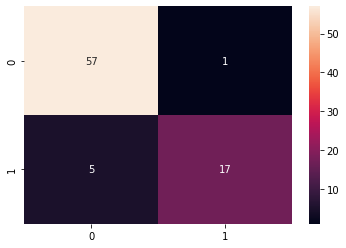

In [ ]:
cf = confusion_matrix(Y_test,Y_predict)
sns.heatmap(cf,annot=True)
plt.show()

In [ ]:
clas=classification_report(Y_test,Y_predict)
print(clas)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



In [ ]:
print("Accuracy",accuracy_score(Y_test,Y_predict)*100 )
print("precision",cf[1,1]/cf[0,1]+cf[1,1])

Accuracy 92.5
precision 34.0


In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
print(mse)

r2 = r2_score(Y_test, Y_predict)
print(r2)

0.075
0.6238244514106583
